# 3.c Model Development Sliding window (Close)

## A360 MDK interface

In [1]:
a360ai

<A360 AI Interface for project: Btc-price>

In [2]:
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'a360-btc-use-case'

### Import Necessary Packages

In [3]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,)

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

### Set Default Data Repo and load data

In [4]:
a360ai.set_default_datarepo(DATAREPO)

In [5]:
a360ai.list_datasets()

base_name extension      size
1   X_test_close.parquet   parquet  217947.0
2  X_train_close.parquet   parquet  477090.0
3    X_val_close.parquet   parquet   25276.0
4   y_test_close.parquet   parquet   13168.0
5  y_train_close.parquet   parquet   27716.0
6    y_val_close.parquet   parquet    1892.0

### Load Data

In [6]:
X_train = a360ai.load_dataset("X_train_close.parquet")
y_train = a360ai.load_dataset("y_train_close.parquet")
X_test = a360ai.load_dataset("X_test_close.parquet")
y_test = a360ai.load_dataset("y_test_close.parquet")
X_val = a360ai.load_dataset("X_val_close.parquet")
y_val = a360ai.load_dataset("y_val_close.parquet")

In [7]:
X_train

0             1             2             3             4   \
2653  48628.511719  50784.539063  50822.195313  50429.859375  50809.515625   
692     587.801025    592.103027    589.119995    587.559021    585.588013   
421     338.152008    336.752991    332.906006    320.165985    330.751007   
592     451.875000    444.669006    450.303986    446.721985    447.976013   
927    1080.500000   1102.170044   1143.810059   1133.250000   1124.780029   
...            ...           ...           ...           ...           ...   
2763  39521.902344  40127.183594  41166.730469  39935.515625  40553.464844   
905    1116.719971   1175.829956   1221.380005   1231.920044   1240.000000   
1096   3582.879883   4065.199951   3924.969971   3905.949951   3631.040039   
235     240.296005    242.158005    241.112000    236.376999    236.929001   
1061   4073.260010   4325.129883   4181.930176   4376.629883   4331.689941   

                5             6             7             8             9   \
2653  50640.417969  47588.855469  46444.710938  47178.125000  46306.445313   
692     570.473022    567.239990    577.439026    573.216003    574.317993   
421     335.093994    334.589996    326.148987    322.022003    326.927002   
592     459.602997    458.536011    458.548004    460.483002    450.894989   
927    1182.680054   1176.900024   1175.949951   1187.869995   1187.130005   
...            ...           ...           ...           ...           ...   
2763  40424.484375  39716.953125  40826.214844  41502.750000  41374.378906   
905    1249.609985   1187.810059   1100.229980    973.817993   1036.739990   
1096   3630.699951   3792.399902   3682.840088   3926.070068   3892.350098   
235     237.604996    236.153000    236.802002    233.128006    231.947006   
1061   4160.620117   4193.700195   4087.659912   4001.739990   4100.520020   

      ...            20            21            22            23  \
2653  ...  42735.855469  43949.101563  42591.570313  43099.699219   
692   ...    574.106995    577.502991    575.471985    572.302979   
421   ...    359.187012    361.045990    363.183014    388.949005   
592   ...    443.187988    439.322998    444.154999    445.980988   
927   ...   1222.050049   1231.709961   1207.209961   1250.150024   
...   ...           ...           ...           ...           ...   
2763  ...  38469.093750  38529.328125  37750.453125  39698.371094   
905   ...   1026.430054   1071.790039   1080.500000   1102.170044   
1096  ...   4426.890137   4610.479980   4772.020020   4781.990234   
235   ...    233.345001    230.190002    222.925995    225.802994   
1061  ...   4578.770020   4582.959961   4236.310059   4376.529785   

                24            25            26            27            28  \
2653  43177.398438  43113.878906  42250.550781  42375.632813  41744.328125   
692     575.536987    598.211975    608.633972    606.590027    610.435974   
421     388.782990    395.536011    415.562988    417.562988    415.479004   
592     449.598999    453.384003    473.463989    530.039978    526.232971   
927    1265.489990   1281.079956   1317.729980   1316.479980   1321.790039   
...            ...           ...           ...           ...           ...   
2763  36575.140625  36040.921875  35501.953125  34059.265625  30296.953125   
905    1143.810059   1133.250000   1124.780029   1182.680054   1176.900024   
1096   4826.479980   5446.910156   5647.209961   5831.790039   5678.189941   
235     225.873993    224.324005    224.951996    225.619003    222.880997   
1061   4597.120117   4599.879883   4228.750000   4226.060059   4122.939941   

                29  
2653  40680.417969  
692     614.544006  
421     451.937988  
592     533.864014  
927    1347.890015  
...            ...  
2763  31022.906250  
905    1175.949951  
1096   5725.589844  
235     228.488998  
1061   4161.270020  

[1949 rows x 30 columns]

In [8]:
scaler = MinMaxScaler()
# transform data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)
X_val = scaler.fit_transform(X_val)
y_val = scaler.fit_transform(y_val)

### Defining functions to compute metrics

In [130]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Looking at the shape of the data

In [131]:
X_train.shape

(1949, 30)

In [133]:
y_train.shape

(1949, 1)

In [134]:
#making a variable to perform predictions and replace original values
X_val_predict=X_val

### Linear Regression Model

In [16]:
model_reg = a360ai.get_or_create_model(model_name=f"btc_reg_1")

In [17]:
experiment = model_reg.get_or_create_experiment(
    experiment_name = f"btc_reg_model_2",
    model_flavor = "sklearn",
    enable_drift_monitoring=True,
    train_features=X_train,
    train_target=y_train,
    data_exploration_file= "/home/jovyan/EDA.ipynb",
    data_preparation_file= "/home/jovyan/Preprocessing_sliding_window_close.ipynb",
    model_training_file= "/home/jovyan/model_development_sliding_close.ipynb",
)



//-- Experiment Loaded --//
Model Name: btc_reg_1
Experiment Name: btc_reg_model_2
Final Run Id: None
Model Flavor: sklearn
Input Signature: ndarray: float64 (30,)
Output Signature: ndarray: float64 (1,)
Data Exploration File: /home/jovyan/EDA.ipynb
Data Preparation File: /home/jovyan/Preprocessing_sliding_window_close.ipynb
Model Training File: /home/jovyan/model_development_sliding_close.ipynb
Drift Monitoring Enabled: True



In [18]:
experiments_reg = model_reg.list_experiments()
experiments_reg

id bestRun  \
0  c6804faf-8842-422a-8b6e-1394bf0febd2    None   

                               model_id  experiment_name best_run_id  \
0  f4297470-ce5f-4db3-bd60-d19ce0b702a7  btc_reg_model_2        None   

  model_flavor         input_signature       output_signature  \
0      sklearn  ndarray: float64 (30,)  ndarray: float64 (1,)   

    data_exploration_file                              data_preparation_file  \
0  /home/jovyan/EDA.ipynb  /home/jovyan/Preprocessing_sliding_window_clos...   

                                 model_training_file  \
0  /home/jovyan/model_development_sliding_close.i...   

                                            baseline train_shape model_name  \
0  {'0': {'mean': 0.17297859300111065, 'std': 0.2...        [30]  btc_reg_1   

         updated_at  
0  2022-07-18 21:40

In [19]:
count = 1
for n in [10,25,50,75,100,125,150]:
    with experiment.run_experiment() as run:
    
        hyperparams = {
                   
        }
    
        reg = LinearRegression(**hyperparams)
        reg.fit(X_train, y_train)
        train_score = reg.score(X_train, y_train)
        test_score = reg.score(X_test, y_test)

        metrics = {
            "train_score": train_score,
            "test_score": test_score,
        }

        run.log_metrics(metrics)
        run.log_hyperparameters(hyperparams)
        run.log_model(reg)
        
        print("Run " + str(count) + " Complete!")
        count = count + 1 

Run 1 Complete!
Run 2 Complete!
Run 3 Complete!
Run 4 Complete!
Run 5 Complete!
Run 6 Complete!
Run 7 Complete!


In [20]:
runs_reg = experiment.list_runs()
runs_reg

id                               dataset  \
0  fb3917bd-116d-4171-9174-dba498965b33  7cd977f1-fdb6-4bcc-8418-c74e16e15668   
1  b5852fa6-b11a-4746-929b-06fea8b614e1  7cd977f1-fdb6-4bcc-8418-c74e16e15668   
2  e0eff459-bd97-4b04-9f3b-c25494b791c4  7cd977f1-fdb6-4bcc-8418-c74e16e15668   
3  f77b292f-8032-4f33-bbdb-2de8a08195c8  7cd977f1-fdb6-4bcc-8418-c74e16e15668   
4  4d988762-df74-48f1-9196-dbe306657684  7cd977f1-fdb6-4bcc-8418-c74e16e15668   
5  30a98532-9c58-4fab-bdaa-c483755261c8  7cd977f1-fdb6-4bcc-8418-c74e16e15668   
6  13726fac-db5c-4fce-9ae6-a1d6e51a9b1a  7cd977f1-fdb6-4bcc-8418-c74e16e15668   

                                      artifact_paths  metric_test_score  \
0  [{'id': '7975cd7e-5cdd-466c-9bd9-c031a5530662'...           0.992372   
1  [{'id': '0ded1367-774f-4be7-b723-c95a8764b499'...           0.992372   
2  [{'id': 'db75b3da-4597-4732-a7cd-8662c7a72b06'...           0.992372   
3  [{'id': 'd87817b0-35f2-430b-a5a9-6dc1e7144b18'...           0.992372   
4  [{'id': '0b052309-4149-4c9c-8365-4a0c35bbed61'...           0.992372   
5  [{'id': 'efcde657-4f5d-421f-bb4a-2267eda7b264'...           0.992372   
6  [{'id': 'c69e4a4b-0c33-445e-b2be-a265ba52560f'...           0.992372   

   metric_train_score  metadata_run_time  
0            0.997849           0.013744  
1            0.997849           0.005206  
2            0.997849           0.004958  
3            0.997849           0.005029  
4            0.997849           0.005323  
5            0.997849           0.005198  
6            0.997849           0.004980

In [21]:
best_run_id_reg = runs_reg.sort_values("metric_test_score", ascending=False).id.values[0]
best_run_id_reg

'fb3917bd-116d-4171-9174-dba498965b33'

In [22]:
model_reg.set_final_run(experiment, best_run_id_reg)

In [142]:
# Checking model performance on train set
print("Training Performance:")
reg_model_perf_train = model_performance_regression(reg, X_train, y_train)
reg_model_perf_train
print("Testing Performance:")
reg_model_perf_train = model_performance_regression(reg, X_test, y_test)
reg_model_perf_train

Training Performance:
Testing Performance:


RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.046403  0.020376   0.985618        0.985082  1.15106

### Performace Visualization on Test Set

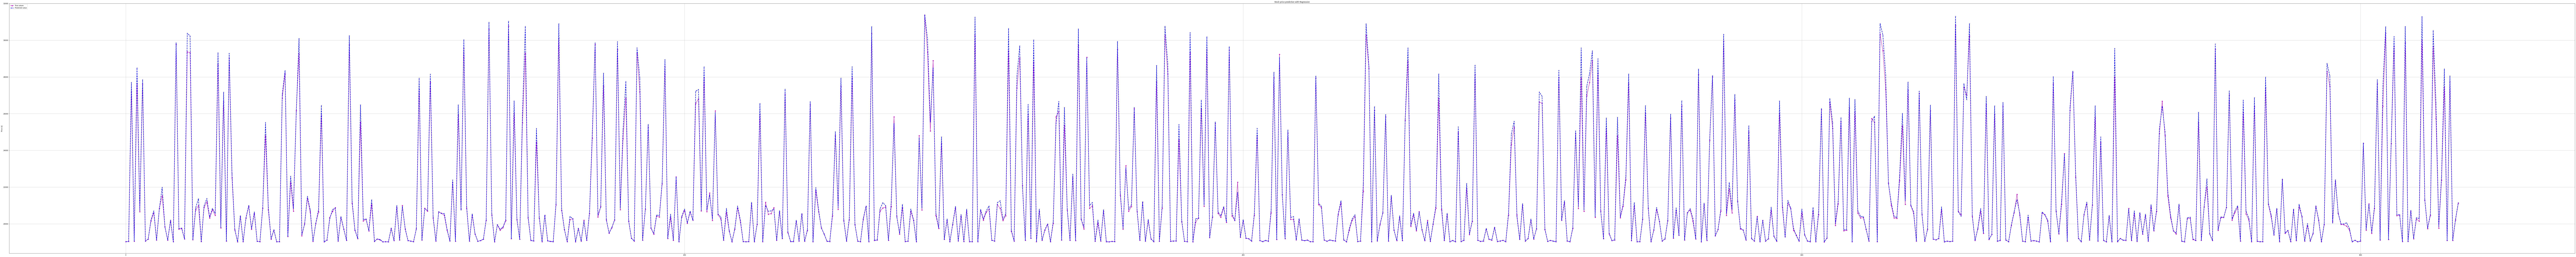

In [143]:
##Perform visualization.
ln_x_test = range(len(X_test))
y_predict = reg.predict(X_test)
#Set the canvas.
plt.figure(figsize=(300,30))
#Draw with a red solid line.
plt.plot (ln_x_test, scaler.inverse_transform(y_test), 'm-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, scaler.inverse_transform(y_predict), 'b--+', lw = 3, label=u'Predicted value')
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with Regression")
plt.ylabel('Price ($)')
plt.show()

### Function to predict and replace values in the 30 day validation set

In [144]:
def prediction_replace(value):
    """function to predict and replace validation set"""
    j=0
    i=0
    f=0
    preds=[]
    #for f in range(len(value)-1):
    for i in range(len(value)-1):
        pred_val=reg.predict(value[f:f+1])
        preds.append(pred_val)
        value[i+1][29-j]=preds[i]
        #value[i][len(value[i,])-1-j]=pred_val
        j+=1
        f+=1
        y_val_predict=preds
    return y_val_predict
 
 

### Variable stores Our predicted values 

In [145]:
y_val_predict=prediction_replace(X_val_predict)

In [162]:
X_val_predict.shape

(30, 30)

In [146]:
#transforming variable to a single array
y_val_predict=np.concatenate(y_val_predict)

In [167]:
y_val_predict

array([[8.00501688e-01],
       [9.34523932e-01],
       [9.18290669e-01],
       [8.13116295e-01],
       [8.78046474e-01],
       [9.15594370e-01],
       [1.13136183e+00],
       [8.44091152e-01],
       [9.31347850e-01],
       [8.21542260e-01],
       [7.55569355e-01],
       [6.08465795e-01],
       [2.88712698e-01],
       [2.25932155e-01],
       [2.67009725e-01],
       [7.90195755e-02],
       [1.11862476e-01],
       [5.59083789e-02],
       [1.81080011e-01],
       [9.54073879e-02],
       [1.04160174e-03],
       [1.32523864e-01],
       [2.38201810e-01],
       [2.10152660e-01],
       [2.90862028e-01],
       [2.05665243e-01],
       [1.34201527e-01],
       [1.21013887e-01],
       [9.68272273e-02]])

### Checking performance

In [147]:
print("Validation Performance:")
linear_regression_perf_val = model_performance_regression(reg, X_val_predict, y_val)
linear_regression_perf_val

Validation Performance:


RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.203227  0.146556   0.891309        4.152035  8.61596

### Inverse Transforming values

In [148]:
true_y_predict=scaler.inverse_transform(y_val_predict)

In [149]:
true_y_predict=pd.DataFrame(true_y_predict,columns=['price'])

In [150]:
true_y=scaler.inverse_transform(y_val)

In [151]:
true_y=pd.DataFrame(true_y,columns=['price'])

In [153]:
y_train

array([[5.43008266e-01],
       [6.39568008e-03],
       [3.53044702e-03],
       ...,
       [8.09651317e-02],
       [4.46111477e-04],
       [5.88797192e-02]])

### Visualizing perfromance on validation set

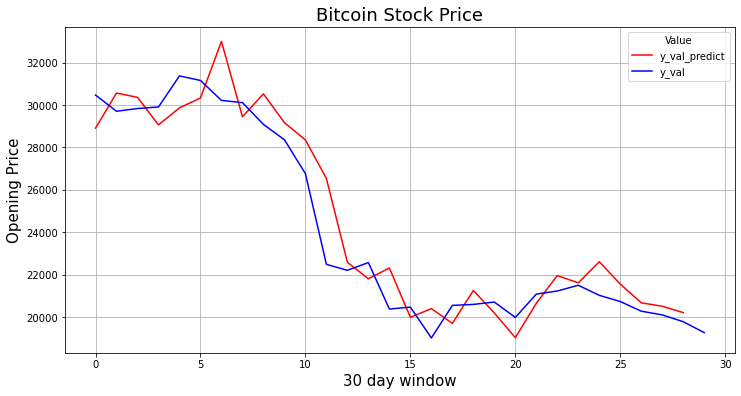

In [60]:
plt.figure(figsize=(12,6))
plt.plot(true_y_predict['price'], label = 'y_val_predict',color='red')
plt.plot(true_y['price'],label = "y_val", color = 'blue')
plt.legend(title='Value')
plt.ylabel("Opening Price", fontsize=15)
plt.xlabel("30 day window", fontsize=15)
plt.title("Bitcoin Stock Price", fontsize=18)
#display plot
plt.grid(True)
plt.show()

### Checking difference in prediction

In [61]:
#value of of difference in prediction
drift=true_y-true_y_predict

In [62]:
#percentage of difference in prediction
drift_precentage=((true_y-true_y_predict)/true_y)*100

### Visulaizing the difference

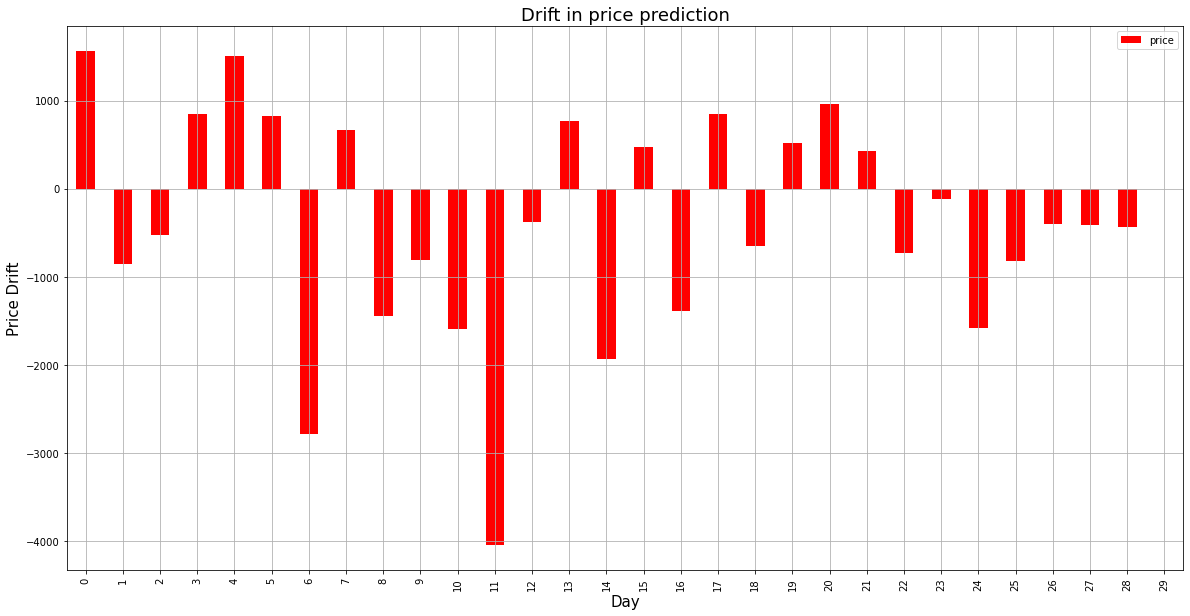

In [63]:
#difference in value
drift.plot(kind="bar",color='red',figsize=(20,10) )
plt.ylabel("Price Drift", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.title("Drift in price prediction", fontsize=18)
plt.grid(True)

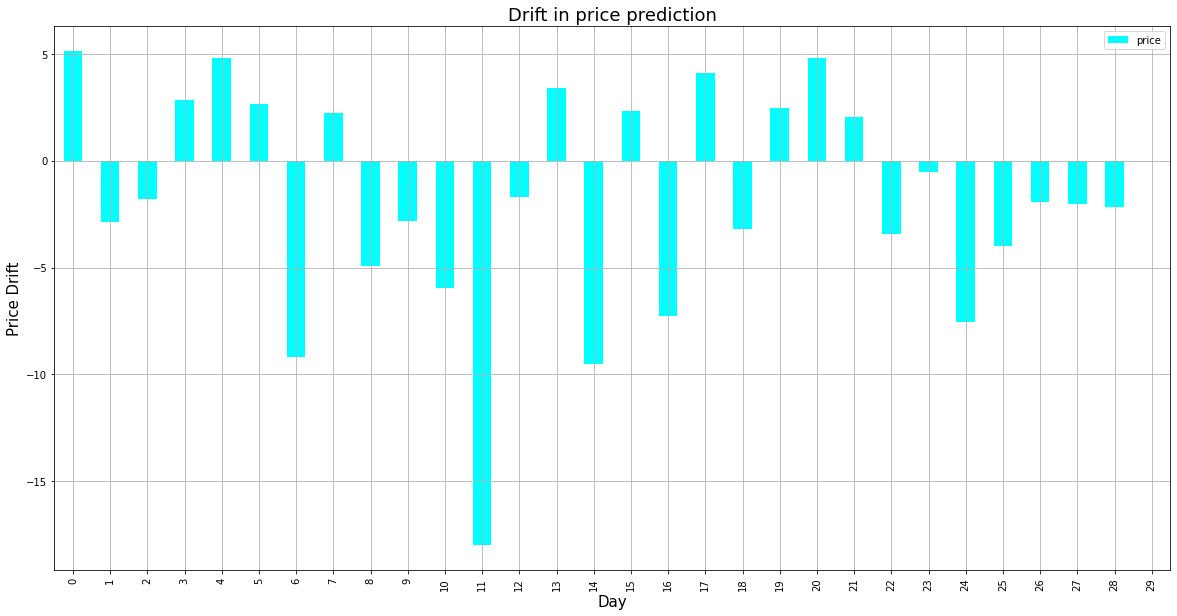

In [64]:
#difference in percentage
drift_precentage.plot(kind="bar",color='cyan',figsize=(20,10) )
plt.ylabel("Price Drift", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.title("Drift in price prediction", fontsize=18)
plt.grid(True)

In [160]:
X_train.shape

(1949, 30)

In [182]:
future_forecast=np.zeros(900).reshape((30,30))

In [183]:
future_forecast

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [187]:
j=0
for j in range(len(future_forecast)):
    future_forecast[0][j]=y_val_predict[j-1]
    j+=1 

In [188]:
future_forecast

array([[9.68272273e-02, 8.00501688e-01, 9.34523932e-01, 9.18290669e-01,
        8.13116295e-01, 8.78046474e-01, 9.15594370e-01, 1.13136183e+00,
        8.44091152e-01, 9.31347850e-01, 8.21542260e-01, 7.55569355e-01,
        6.08465795e-01, 2.88712698e-01, 2.25932155e-01, 2.67009725e-01,
        7.90195755e-02, 1.11862476e-01, 5.59083789e-02, 1.81080011e-01,
        9.54073879e-02, 1.04160174e-03, 1.32523864e-01, 2.38201810e-01,
        2.10152660e-01, 2.90862028e-01, 2.05665243e-01, 1.34201527e-01,
        1.21013887e-01, 9.68272273e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

In [175]:
for i in range(1:29):
    j = 0
    k=0
    future_forecast[i][j]=future_forecast[0][k-1]
    j-=1
    k-=1

In [189]:
j=0
for i in range(len(future_forecast)-1):
        future_forecast[i+1][29-j]=y_val_predict[i]
        j+=1

In [190]:
future_forecast

array([[9.68272273e-02, 8.00501688e-01, 9.34523932e-01, 9.18290669e-01,
        8.13116295e-01, 8.78046474e-01, 9.15594370e-01, 1.13136183e+00,
        8.44091152e-01, 9.31347850e-01, 8.21542260e-01, 7.55569355e-01,
        6.08465795e-01, 2.88712698e-01, 2.25932155e-01, 2.67009725e-01,
        7.90195755e-02, 1.11862476e-01, 5.59083789e-02, 1.81080011e-01,
        9.54073879e-02, 1.04160174e-03, 1.32523864e-01, 2.38201810e-01,
        2.10152660e-01, 2.90862028e-01, 2.05665243e-01, 1.34201527e-01,
        1.21013887e-01, 9.68272273e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

In [170]:
y_val_predict

array([[8.00501688e-01],
       [9.34523932e-01],
       [9.18290669e-01],
       [8.13116295e-01],
       [8.78046474e-01],
       [9.15594370e-01],
       [1.13136183e+00],
       [8.44091152e-01],
       [9.31347850e-01],
       [8.21542260e-01],
       [7.55569355e-01],
       [6.08465795e-01],
       [2.88712698e-01],
       [2.25932155e-01],
       [2.67009725e-01],
       [7.90195755e-02],
       [1.11862476e-01],
       [5.59083789e-02],
       [1.81080011e-01],
       [9.54073879e-02],
       [1.04160174e-03],
       [1.32523864e-01],
       [2.38201810e-01],
       [2.10152660e-01],
       [2.90862028e-01],
       [2.05665243e-01],
       [1.34201527e-01],
       [1.21013887e-01],
       [9.68272273e-02]])

In [200]:
X_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

In [207]:
feature_names= X_train.columns

In [208]:
feature_names

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')